In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv(r"C:\Users\91755\Downloads\Bank_Personal_Loan_Modelling.csv")

In [5]:
df = df.drop(['ID'],axis=1)
x = df.drop(['Personal Loan'],axis=1).values

In [7]:
sc = StandardScaler()
x = sc.fit_transform(x)
x[:5]

array([[-1.77441684, -1.66607847, -0.53822878, -0.96411408,  1.39741398,
        -0.19338544, -1.04907792, -0.55552393,  2.92891517, -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.09633022, -0.8641094 , -1.44393158,  0.52599094,
        -0.25061056, -1.04907792, -0.55552393,  2.92891517, -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -0.44516316, -1.36379301,  0.73881384, -1.21685513,
        -0.53673618, -1.04907792, -0.55552393, -0.34142334, -0.25354028,
        -1.21661774, -0.64531434],
       [-0.90197022, -0.96841258,  0.56976533,  0.45224308, -1.21685513,
         0.43609092,  0.14170292, -0.55552393, -0.34142334, -0.25354028,
        -1.21661774, -0.64531434],
       [-0.90197022, -1.05562082, -0.62513027, -0.85900671,  1.39741398,
        -0.53673618,  0.14170292, -0.55552393, -0.34142334, -0.25354028,
        -1.21661774,  1.54963239]])

In [9]:
y = df['Personal Loan'].values 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10,test_size=0.3)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3500, 12)
(3500,)
(1500, 12)
(1500,)


In [14]:
tf.random.set_seed(7)
model = Sequential()
model.add(Input(shape=[12]))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='BinaryCrossentropy',optimizer='sgd',metrics=['accuracy'])

In [17]:
r = model.fit(x_train,y_train,epochs=20)

Epoch 1/20
110/110 [==============================] - 0s 849us/step - loss: 0.7826 - accuracy: 0.4517
Epoch 2/20
110/110 [==============================] - 0s 846us/step - loss: 0.5106 - accuracy: 0.8934
Epoch 3/20
110/110 [==============================] - 0s 938us/step - loss: 0.4194 - accuracy: 0.9026
Epoch 4/20
110/110 [==============================] - 0s 863us/step - loss: 0.3729 - accuracy: 0.9026
Epoch 5/20
110/110 [==============================] - 0s 854us/step - loss: 0.3462 - accuracy: 0.9026
Epoch 6/20
110/110 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.9029
Epoch 7/20
110/110 [==============================] - 0s 1ms/step - loss: 0.3188 - accuracy: 0.9029
Epoch 8/20
110/110 [==============================] - 0s 1ms/step - loss: 0.3108 - accuracy: 0.9029
Epoch 9/20
110/110 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.9029
Epoch 10/20
110/110 [==============================] - 0s 929us/step - loss: 0.2993 - accu

In [18]:
acc = model.evaluate(x_test,y_test)
print("Accuracy: ",acc[1])

47/47 [==============================] - 0s 756us/step - loss: 0.2491 - accuracy: 0.9067
Accuracy:  0.9066666960716248


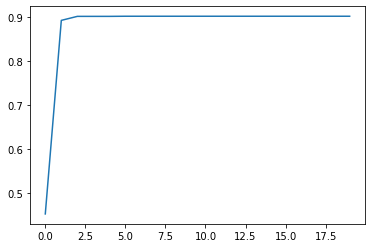

In [19]:
plt.plot(r.history['accuracy'])

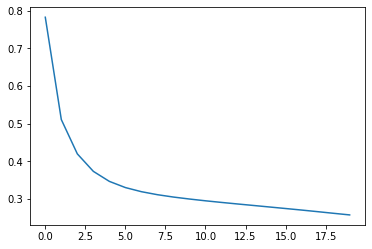

In [20]:
plt.plot(r.history['loss'])